In [150]:
import pandas as pd
bitcoin = pd.read_excel('GDAX.BTC-USD_790301_230316.xlsx')
bitcoin.drop(range(362),inplace=True)
bitcoin

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
362,GDAX.BTC-USD,D,20160101,0,430.35,437.15,427.92,435.66,3788
363,GDAX.BTC-USD,D,20160102,0,435.67,437.56,432.41,435.40,3195
364,GDAX.BTC-USD,D,20160103,0,435.40,435.75,425.02,431.91,3840
365,GDAX.BTC-USD,D,20160104,0,431.90,435.79,431.37,433.85,5848
366,GDAX.BTC-USD,D,20160105,0,433.84,435.64,430.00,433.34,5111
...,...,...,...,...,...,...,...,...,...
2985,GDAX.BTC-USD,D,20230312,0,20619.34,22276.69,20446.24,22219.08,19156
2986,GDAX.BTC-USD,D,20230313,0,22216.02,24710.00,21882.63,24220.00,38678
2987,GDAX.BTC-USD,D,20230314,0,24220.00,26553.90,24052.00,24762.65,44120
2988,GDAX.BTC-USD,D,20230315,0,24761.61,25300.00,23931.01,24377.16,30125


In [151]:
bitcoin = bitcoin.iloc[:,[2,5,7]]
bitcoin.columns = ['Date','Open', 'Close']
bitcoin['Date'] = bitcoin['Date'].map(lambda x:str(x)[0:4]+'-'+str(x)[4:6]+'-'+str(x)[6:8]) 
bitcoin = bitcoin.set_index('Date')
bitcoin

C:\Users\goldme\AppData\Local\Temp\ipykernel_23488\4209251065.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bitcoin['Date'] = bitcoin['Date'].map(lambda x:str(x)[0:4]+'-'+str(x)[4:6]+'-'+str(x)[6:8])


,Open,Close
Date,,
2016-01-01,437.15,435.66
2016-01-02,437.56,435.40
2016-01-03,435.75,431.91
2016-01-04,435.79,433.85
2016-01-05,435.64,433.34
...,...,...
2023-03-12,22276.69,22219.08
2023-03-13,24710.00,24220.00
2023-03-14,26553.90,24762.65


<AxesSubplot: xlabel='Date'>

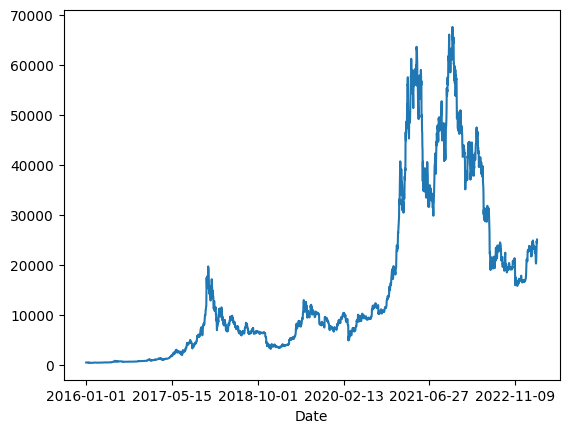

In [152]:
bitcoin['Close'].plot()

In [153]:
bitcoin.index =pd.to_datetime(bitcoin.index)
bitcoin['Year']=bitcoin.index.year
bitcoin['Mon']=bitcoin.index.month
bitcoin['Day']=bitcoin.index.day
dates=bitcoin[['Year','Mon','Day']]

bitcoin.index=pd.MultiIndex.from_tuples(dates.values.tolist(), names=dates.columns)
bitcoin

Open     Close  Year  Mon  Day
Year Mon Day                                    
2016 1   1      437.15    435.66  2016    1    1
         2      437.56    435.40  2016    1    2
         3      435.75    431.91  2016    1    3
         4      435.79    433.85  2016    1    4
         5      435.64    433.34  2016    1    5
...                ...       ...   ...  ...  ...
2023 3   12   22276.69  22219.08  2023    3   12
         13   24710.00  24220.00  2023    3   13
         14   26553.90  24762.65  2023    3   14
         15   25300.00  24377.16  2023    3   15
         16   25043.97  25032.76  2023    3   16

[2628 rows x 5 columns]

In [154]:
bitcoin['Difference'] = bitcoin['Open']-bitcoin['Close']
bitcoin

Open     Close  Year  Mon  Day  Difference
Year Mon Day                                                
2016 1   1      437.15    435.66  2016    1    1        1.49
         2      437.56    435.40  2016    1    2        2.16
         3      435.75    431.91  2016    1    3        3.84
         4      435.79    433.85  2016    1    4        1.94
         5      435.64    433.34  2016    1    5        2.30
...                ...       ...   ...  ...  ...         ...
2023 3   12   22276.69  22219.08  2023    3   12       57.61
         13   24710.00  24220.00  2023    3   13      490.00
         14   26553.90  24762.65  2023    3   14     1791.25
         15   25300.00  24377.16  2023    3   15      922.84
         16   25043.97  25032.76  2023    3   16       11.21

[2628 rows x 6 columns]

In [155]:
year_day_mean=bitcoin.groupby(level=[0,1]).mean()
tmpmn=year_day_mean['Difference']
mon_mean=tmpmn.unstack()
mon_mean.columns=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
tmpmn

Year  Mon
2016  1        9.284194
      2        4.345172
      3        4.210968
      4        2.573333
      5        4.894839
                ...    
2022  11     443.167333
      12     196.263226
2023  1      272.298710
      2      445.063929
      3      527.829375
Name: Difference, Length: 87, dtype: float64

In [156]:
corr=mon_mean.corr()
corr

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Jan,1.000000,0.988466,0.953788,0.962776,0.926773,0.932198,0.847554,0.929582,0.881501,0.809750,0.836966,0.576831
Feb,0.988466,1.000000,0.985249,0.982397,0.939976,0.951364,0.861184,0.944402,0.895968,0.819751,0.852637,0.587955
Mar,0.953788,0.985249,1.000000,0.981486,0.951225,0.943711,0.840590,0.950313,0.916827,0.844404,0.888665,0.641851
Apr,0.962776,0.982397,0.981486,1.000000,0.961944,0.985820,0.908232,0.970053,0.926307,0.854588,0.879509,0.620261
May,0.926773,0.939976,0.951225,0.961944,1.000000,0.957683,0.890191,0.986620,0.991061,0.961050,0.966265,0.770514
Jun,0.932198,0.951364,0.943711,0.985820,0.957683,1.000000,0.963977,0.981457,0.933085,0.873744,0.877639,0.620544
Jul,0.847554,0.861184,0.840590,0.908232,0.890191,0.963977,1.000000,0.945152,0.882112,0.843154,0.814506,0.558255
Aug,0.929582,0.944402,0.950313,0.970053,0.986620,0.981457,0.945152,1.000000,0.978325,0.942382,0.941751,0.713326
Sep,0.881501,0.895968,0.916827,0.926307,0.991061,0.933085,0.882112,0.978325,1.000000,0.984910,0.988231,0.831777
Oct,0.809750,0.819751,0.844404,0.854588,0.961050,0.873744,0.843154,0.942382,0.984910,1.000000,0.979635,0.850750


([<matplotlib.axis.YTick at 0x25409245180>,
 [Text(0, 0, 'Jan'),
  Text(0, 1, 'Feb'),
  Text(0, 2, 'Mar'),
  Text(0, 3, 'Apr'),
  Text(0, 4, 'May'),
  Text(0, 5, 'Jun'),
  Text(0, 6, 'Jul'),
  Text(0, 7, 'Aug'),
  Text(0, 8, 'Sep'),
  Text(0, 9, 'Oct'),
  Text(0, 10, 'Nov'),
  Text(0, 11, 'Dec')])

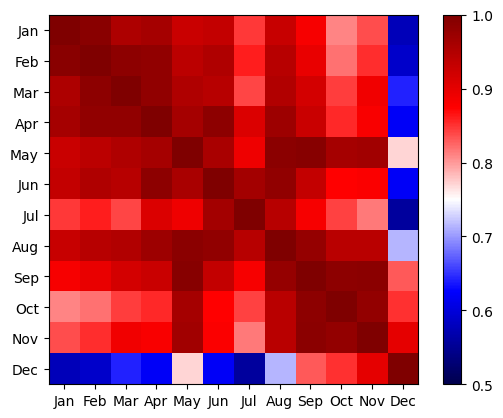

In [157]:
import matplotlib.pyplot as plt
plt.imshow(corr,cmap='seismic',interpolation='none',vmin=0.5,vmax=1)
plt.colorbar()
plt.xticks(range(len(corr)),corr.columns)
plt.yticks(range(len(corr)),corr.columns)

<AxesSubplot: xlabel='Feb', ylabel='Jan'>

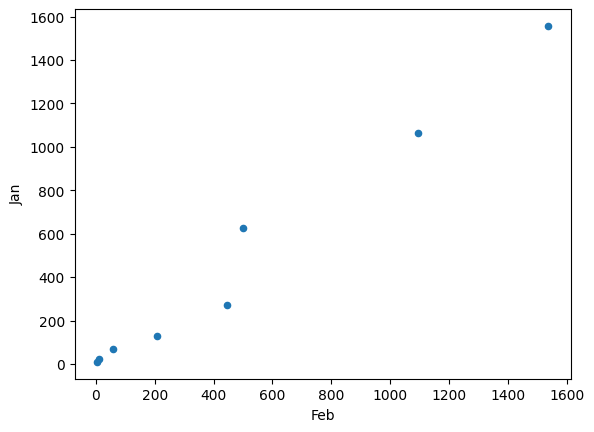

In [158]:
mon_mean.plot(kind='scatter',x='Feb',y='Jan')

<AxesSubplot: xlabel='Mar', ylabel='Dec'>

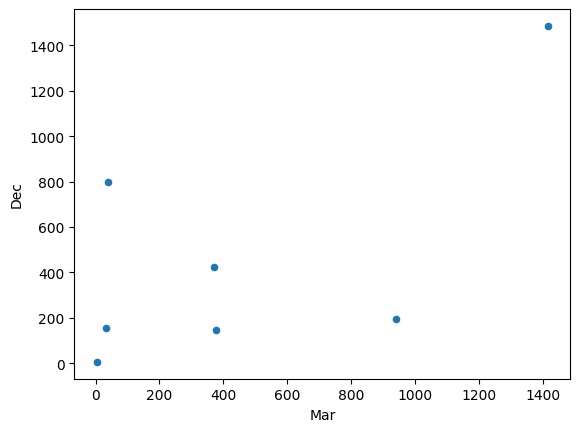

In [159]:
mon_mean.plot(kind='scatter',x='Mar',y='Dec')